In [ ]:
# By Junwoo Yun
import pandas as pd
import numpy as np
import random

PATH = '/content/drive/MyDrive/dacon/datathon/'

df_country = pd.read_csv(PATH+'country.csv')
df_league = pd.read_csv(PATH+'league.csv')
df_match = pd.read_csv(PATH+'match.csv')
df_player = pd.read_csv(PATH+'player.csv')
df_player_attributes = pd.read_csv(PATH+'player_attributes.csv')
df_team = pd.read_csv(PATH+'team.csv', encoding = 'ISO-8859-1')
df_team_attributes = pd.read_csv(PATH+'team_attributes.csv')

# country.csv and league.csv
11 country and 11 Leages 

In [ ]:
print(f'country.csv informations\n{df_country}\n')
print(df_country.name.unique())

country.csv informations
    country_id         name
0            1      Belgium
1         1729      England
2         4769       France
3         7809      Germany
4        10257        Italy
5        13274  Netherlands
6        15722       Poland
7        17642     Portugal
8        19694     Scotland
9        21518        Spain
10       24558  Switzerland

['Belgium' 'England' 'France' 'Germany' 'Italy' 'Netherlands' 'Poland'
 'Portugal' 'Scotland' 'Spain' 'Switzerland']


In [ ]:
print(f'league.csv informations\n{df_league}\n')
print(df_league.name.unique())

league.csv informations
    league_id  country_id                      name
0           1           1    Belgium Jupiler League
1        1729        1729    England Premier League
2        4769        4769            France Ligue 1
3        7809        7809     Germany 1. Bundesliga
4       10257       10257             Italy Serie A
5       13274       13274    Netherlands Eredivisie
6       15722       15722        Poland Ekstraklasa
7       17642       17642  Portugal Liga ZON Sagres
8       19694       19694   Scotland Premier League
9       21518       21518           Spain LIGA BBVA
10      24558       24558  Switzerland Super League

['Belgium Jupiler League' 'England Premier League' 'France Ligue 1'
 'Germany 1. Bundesliga' 'Italy Serie A' 'Netherlands Eredivisie'
 'Poland Ekstraklasa' 'Portugal Liga ZON Sagres' 'Scotland Premier League'
 'Spain LIGA BBVA' 'Switzerland Super League']


Summary 

- league id is same as country id 
- there's 11 each

# Player and Player_attributes aggregation

In [ ]:
df_player.head(2)

,player_id,player_name,birthday,height,weight
0,505942,Aaron Appindangoye,2/29/92 0:00,182.88,187
1,155782,Aaron Cresswell,12/15/89 0:00,170.18,146


In [ ]:
df_player_attributes.head(2)

,player_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,2/18/16 0:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,505942,11/19/15 0:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [ ]:
# aggregate player and player attributes
df_player = pd.merge(df_player, df_player_attributes, on='player_id')
df_player

,player_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,Aaron Appindangoye,2/29/92 0:00,182.88,187,2/18/16 0:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,505942,Aaron Appindangoye,2/29/92 0:00,182.88,187,11/19/15 0:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,505942,Aaron Appindangoye,2/29/92 0:00,182.88,187,9/21/15 0:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,505942,Aaron Appindangoye,2/29/92 0:00,182.88,187,3/20/15 0:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,505942,Aaron Appindangoye,2/29/92 0:00,182.88,187,2/22/07 0:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,39902,Zvjezdan Misimovic,6/5/82 0:00,180.34,176,8/30/09 0:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,39902,Zvjezdan Misimovic,6/5/82 0:00,180.34,176,2/22/09 0:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,39902,Zvjezdan Misimovic,6/5/82 0:00,180.34,176,8/30/08 0:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,39902,Zvjezdan Misimovic,6/5/82 0:00,180.34,176,8/30/07 0:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [ ]:
#could see row matches and successfully aggregated
df_player_attributes.shape

(183978, 40)

# Handing NaN in Player_attributes

In [ ]:
#since 836, 2713 repeats (except attacking_work_rate with 3230), we could see specific row has null datas
df_player.isnull().sum()

player_id                 0
player_name               0
birthday                  0
height                    0
weight                    0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties           

In [ ]:
x = df_player.isnull().sum().to_frame()
x.columns = ['Null']

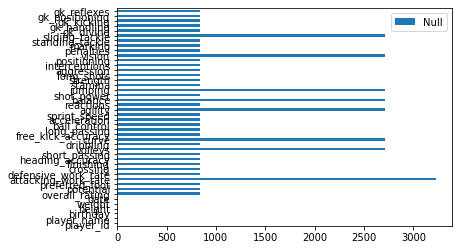

In [ ]:
x.plot.barh(y='Null')

In [ ]:
# date seems same so see if data on specific date is invalid
df_player[df_player['overall_rating'].isna()]

,player_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
483,31684,Abdeslam Ouaddou,11/1/78 0:00,190.50,181,2/22/07 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983,29904,Abel Gomez,2/20/82 0:00,182.88,165,2/22/07 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752,24159,Adam Johnson,7/14/87 0:00,175.26,139,2/22/07 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2089,31916,Adam Rooney,4/21/88 0:00,177.80,172,2/22/07 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2482,37249,Adil Chihi,2/21/88 0:00,182.88,172,2/22/07 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182587,25538,Youssouf Hadji,2/25/80 0:00,182.88,172,2/22/07 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183249,32633,Zbigniew Malkowski,1/19/78 0:00,187.96,181,2/22/07 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183309,33823,Zdenek Pospech,12/14/78 0:00,175.26,159,2/22/07 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183361,25772,Zdravko Kuzmanovic,9/22/87 0:00,185.42,176,2/22/07 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# no null data and date does not have correlation
df_player[df_player['overall_rating'].isna()].date.unique()

array(['2/22/07 0:00', '9/21/15 0:00', '1/9/15 0:00', '9/18/14 0:00',
       '9/20/13 0:00', '2/22/10 0:00', '8/30/11 0:00', '2/22/11 0:00',
       '8/30/10 0:00', '8/30/09 0:00', '8/30/08 0:00', '8/30/07 0:00',
       '10/10/14 0:00', '2/21/14 0:00', '2/15/13 0:00', '8/31/12 0:00',
       '2/22/09 0:00', '3/17/16 0:00', '11/6/15 0:00', '10/16/15 0:00',
       '9/25/15 0:00', '5/1/15 0:00', '1/23/15 0:00', '1/16/15 0:00',
       '10/2/14 0:00', '5/23/14 0:00', '3/21/14 0:00', '3/14/14 0:00',
       '2/28/14 0:00', '1/10/14 0:00', '11/22/13 0:00', '2/22/12 0:00',
       '4/28/16 0:00', '4/21/16 0:00', '2/4/16 0:00', '1/28/16 0:00',
       '10/30/15 0:00', '8/21/15 0:00', '4/24/15 0:00', '1/30/15 0:00',
       '11/14/14 0:00', '10/24/14 0:00', '12/6/13 0:00', '10/4/13 0:00'],
      dtype=object)

In [ ]:
df_player[df_player['player_id']==31684]

,player_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
478,31684,Abdeslam Ouaddou,11/1/78 0:00,190.5,181,8/30/09 0:00,73.0,76.0,right,NaN,_0,56.0,34.0,70.0,70.0,NaN,56.0,NaN,26.0,71.0,60.0,69.0,68.0,NaN,70.0,NaN,72.0,NaN,81.0,79.0,58.0,73.0,73.0,70.0,NaN,68.0,76.0,75.0,NaN,5.0,23.0,71.0,23.0,23.0
479,31684,Abdeslam Ouaddou,11/1/78 0:00,190.5,181,2/22/09 0:00,77.0,79.0,right,NaN,_0,68.0,34.0,80.0,72.0,NaN,59.0,NaN,26.0,76.0,54.0,78.0,72.0,NaN,72.0,NaN,82.0,NaN,88.0,82.0,70.0,70.0,79.0,71.0,NaN,69.0,83.0,78.0,NaN,5.0,23.0,76.0,23.0,23.0
480,31684,Abdeslam Ouaddou,11/1/78 0:00,190.5,181,8/30/08 0:00,77.0,80.0,right,NaN,_0,68.0,34.0,80.0,72.0,NaN,59.0,NaN,26.0,76.0,54.0,78.0,72.0,NaN,72.0,NaN,82.0,NaN,88.0,82.0,70.0,70.0,79.0,71.0,NaN,69.0,83.0,78.0,NaN,5.0,23.0,76.0,23.0,23.0
481,31684,Abdeslam Ouaddou,11/1/78 0:00,190.5,181,8/30/07 0:00,78.0,79.0,right,NaN,_0,72.0,34.0,80.0,72.0,NaN,59.0,NaN,26.0,76.0,54.0,67.0,72.0,NaN,69.0,NaN,82.0,NaN,88.0,82.0,76.0,70.0,79.0,71.0,NaN,69.0,80.0,76.0,NaN,5.0,23.0,76.0,23.0,23.0
482,31684,Abdeslam Ouaddou,11/1/78 0:00,190.5,181,2/22/07 0:00,78.0,79.0,right,NaN,_0,72.0,34.0,80.0,72.0,NaN,79.0,NaN,69.0,76.0,54.0,67.0,72.0,NaN,69.0,NaN,82.0,NaN,88.0,82.0,76.0,70.0,79.0,71.0,NaN,69.0,80.0,76.0,NaN,5.0,10.0,76.0,10.0,7.0
483,31684,Abdeslam Ouaddou,11/1/78 0:00,190.5,181,2/22/07 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_player[df_player['player_id']==29904].tail(3)

,player_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
981,29904,Abel Gomez,2/20/82 0:00,182.88,165,8/30/07 0:00,66.0,71.0,right,medium,low,67.0,56.0,64.0,67.0,55.0,66.0,75.0,52.0,70.0,68.0,69.0,63.0,61.0,64.0,63.0,56.0,62.0,66.0,67.0,59.0,61.0,60.0,66.0,76.0,56.0,68.0,67.0,49.0,11.0,21.0,70.0,21.0,21.0
982,29904,Abel Gomez,2/20/82 0:00,182.88,165,2/22/07 0:00,67.0,71.0,right,medium,low,67.0,56.0,48.0,70.0,55.0,60.0,75.0,59.0,68.0,69.0,61.0,64.0,61.0,67.0,63.0,58.0,62.0,66.0,62.0,42.0,64.0,60.0,66.0,76.0,59.0,68.0,63.0,49.0,11.0,6.0,68.0,12.0,6.0
983,29904,Abel Gomez,2/20/82 0:00,182.88,165,2/22/07 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_player[df_player['player_id']==37249].tail(3)

,player_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
2480,37249,Adil Chihi,2/21/88 0:00,182.88,172,8/30/07 0:00,61.0,81.0,left,medium,medium,51.0,56.0,61.0,42.0,67.0,67.0,63.0,58.0,36.0,66.0,73.0,74.0,83.0,62.0,67.0,57.0,58.0,55.0,57.0,51.0,60.0,39.0,42.0,52.0,51.0,28.0,29.0,18.0,5.0,20.0,36.0,20.0,20.0
2481,37249,Adil Chihi,2/21/88 0:00,182.88,172,2/22/07 0:00,61.0,78.0,left,medium,medium,51.0,56.0,61.0,42.0,67.0,67.0,63.0,51.0,36.0,66.0,73.0,74.0,83.0,62.0,67.0,57.0,58.0,55.0,57.0,51.0,60.0,39.0,42.0,52.0,51.0,28.0,29.0,18.0,5.0,3.0,36.0,5.0,2.0
2482,37249,Adil Chihi,2/21/88 0:00,182.88,172,2/22/07 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_player[df_player['player_id']==33823].tail(3)

,player_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
183307,33823,Zdenek Pospech,12/14/78 0:00,175.26,159,8/30/07 0:00,70.0,84.0,right,high,high,72.0,57.0,68.0,69.0,58.0,66.0,65.0,63.0,48.0,63.0,80.0,86.0,71.0,73.0,73.0,64.0,65.0,74.0,66.0,77.0,55.0,74.0,71.0,62.0,62.0,65.0,68.0,76.0,10.0,23.0,48.0,23.0,23.0
183308,33823,Zdenek Pospech,12/14/78 0:00,175.26,159,2/22/07 0:00,66.0,67.0,right,high,high,52.0,67.0,64.0,69.0,58.0,65.0,65.0,42.0,42.0,62.0,62.0,59.0,71.0,48.0,73.0,64.0,65.0,74.0,66.0,77.0,55.0,74.0,71.0,62.0,42.0,64.0,37.0,76.0,10.0,12.0,42.0,13.0,10.0
183309,33823,Zdenek Pospech,12/14/78 0:00,175.26,159,2/22/07 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# As seeing above, 836 players have retired or have no data so could be eliminated
# For 2713 - 836 = 1877 players have NaN in specific columns which means that their position does not require and could not test those skills

df_player[df_player['vision'].isna() & df_player['overall_rating'].notnull()]

,player_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
446,38423,Abdelmajid Oulmers,9/12/78 0:00,172.72,143,2/22/10 0:00,68.0,70.0,right,NaN,_0,60.0,50.0,60.0,74.0,NaN,74.0,NaN,53.0,62.0,73.0,74.0,70.0,NaN,63.0,NaN,64.0,NaN,71.0,64.0,55.0,63.0,69.0,70.0,NaN,47.0,52.0,50.0,NaN,7.0,20.0,62.0,20.0,20.0
447,38423,Abdelmajid Oulmers,9/12/78 0:00,172.72,143,8/30/09 0:00,68.0,70.0,right,NaN,_0,60.0,50.0,60.0,74.0,NaN,74.0,NaN,53.0,62.0,73.0,74.0,70.0,NaN,63.0,NaN,64.0,NaN,71.0,64.0,55.0,63.0,69.0,70.0,NaN,47.0,52.0,50.0,NaN,7.0,20.0,62.0,20.0,20.0
448,38423,Abdelmajid Oulmers,9/12/78 0:00,172.72,143,8/30/08 0:00,68.0,69.0,right,NaN,_0,60.0,50.0,60.0,74.0,NaN,74.0,NaN,53.0,62.0,73.0,74.0,70.0,NaN,63.0,NaN,64.0,NaN,71.0,64.0,55.0,63.0,69.0,70.0,NaN,47.0,52.0,50.0,NaN,7.0,20.0,62.0,20.0,20.0
449,38423,Abdelmajid Oulmers,9/12/78 0:00,172.72,143,8/30/07 0:00,70.0,69.0,right,NaN,_0,60.0,50.0,60.0,74.0,NaN,74.0,NaN,53.0,62.0,73.0,74.0,70.0,NaN,63.0,NaN,64.0,NaN,71.0,64.0,55.0,63.0,69.0,70.0,NaN,47.0,52.0,50.0,NaN,7.0,20.0,62.0,20.0,20.0
450,38423,Abdelmajid Oulmers,9/12/78 0:00,172.72,143,2/22/07 0:00,70.0,69.0,right,NaN,_0,60.0,50.0,70.0,74.0,NaN,74.0,NaN,47.0,62.0,73.0,76.0,70.0,NaN,63.0,NaN,74.0,NaN,73.0,74.0,55.0,73.0,69.0,70.0,NaN,47.0,72.0,70.0,NaN,7.0,7.0,62.0,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183492,45308,Ze Vitor,2/11/82 0:00,175.26,163,2/22/07 0:00,64.0,65.0,right,NaN,_0,41.0,62.0,62.0,64.0,NaN,65.0,NaN,69.0,51.0,66.0,65.0,66.0,NaN,59.0,NaN,59.0,NaN,72.0,69.0,58.0,72.0,69.0,68.0,NaN,69.0,54.0,55.0,NaN,10.0,20.0,51.0,20.0,20.0
183535,30850,Zeljko Kalac,12/16/72 0:00,203.20,209,2/22/09 0:00,73.0,81.0,right,None,o,20.0,20.0,28.0,32.0,NaN,20.0,NaN,12.0,71.0,30.0,52.0,38.0,NaN,58.0,NaN,50.0,NaN,73.0,78.0,20.0,56.0,73.0,41.0,NaN,70.0,20.0,20.0,NaN,75.0,73.0,71.0,73.0,75.0
183536,30850,Zeljko Kalac,12/16/72 0:00,203.20,209,8/30/08 0:00,77.0,81.0,right,None,o,20.0,20.0,28.0,32.0,NaN,20.0,NaN,12.0,78.0,30.0,52.0,38.0,NaN,58.0,NaN,50.0,NaN,73.0,78.0,20.0,56.0,77.0,41.0,NaN,70.0,20.0,20.0,NaN,82.0,75.0,78.0,73.0,78.0
183537,30850,Zeljko Kalac,12/16/72 0:00,203.20,209,8/30/07 0:00,70.0,80.0,right,None,o,40.0,38.0,48.0,48.0,NaN,38.0,NaN,8.0,73.0,28.0,52.0,34.0,NaN,54.0,NaN,40.0,NaN,47.0,54.0,20.0,56.0,62.0,11.0,NaN,56.0,22.0,51.0,NaN,74.0,70.0,73.0,72.0,71.0


In [ ]:
df_player[df_player['player_id']==random.choice(df_player[df_player['vision'].isna() & df_player['overall_rating'].notnull()].player_id.values)]

,player_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
128700,27342,Morten Jensen,9/20/87 0:00,190.5,194,2/22/10 0:00,58.0,71.0,right,NaN,_0,23.0,23.0,23.0,24.0,NaN,23.0,NaN,10.0,59.0,26.0,53.0,42.0,NaN,63.0,NaN,23.0,NaN,58.0,68.0,21.0,56.0,41.0,43.0,NaN,45.0,27.0,23.0,NaN,59.0,56.0,59.0,56.0,58.0
128701,27342,Morten Jensen,9/20/87 0:00,190.5,194,8/30/09 0:00,58.0,71.0,right,NaN,_0,23.0,23.0,23.0,24.0,NaN,23.0,NaN,10.0,59.0,26.0,53.0,42.0,NaN,63.0,NaN,23.0,NaN,58.0,68.0,21.0,56.0,41.0,43.0,NaN,45.0,27.0,23.0,NaN,59.0,56.0,59.0,56.0,58.0
128702,27342,Morten Jensen,9/20/87 0:00,190.5,194,8/30/08 0:00,58.0,72.0,right,NaN,_0,23.0,23.0,23.0,24.0,NaN,23.0,NaN,10.0,59.0,26.0,53.0,42.0,NaN,63.0,NaN,23.0,NaN,58.0,68.0,21.0,56.0,41.0,43.0,NaN,45.0,27.0,23.0,NaN,59.0,56.0,59.0,56.0,58.0
128703,27342,Morten Jensen,9/20/87 0:00,190.5,194,2/22/07 0:00,58.0,72.0,right,NaN,_0,23.0,23.0,23.0,24.0,NaN,23.0,NaN,10.0,59.0,26.0,53.0,42.0,NaN,63.0,NaN,23.0,NaN,58.0,68.0,21.0,56.0,41.0,43.0,NaN,45.0,27.0,23.0,NaN,59.0,56.0,59.0,56.0,58.0


In [ ]:
df_player[df_player['player_id']==random.choice(df_player[df_player['vision'].isna() & df_player['overall_rating'].notnull()].player_id.values)]

,player_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
59176,30252,Frank Baumann,10/29/75 0:00,187.96,179,2/22/09 0:00,76.0,82.0,right,None,o,55.0,43.0,86.0,74.0,NaN,53.0,NaN,43.0,67.0,64.0,61.0,72.0,NaN,69.0,NaN,62.0,NaN,86.0,83.0,42.0,71.0,84.0,80.0,NaN,79.0,81.0,83.0,NaN,7.0,21.0,67.0,21.0,21.0
59177,30252,Frank Baumann,10/29/75 0:00,187.96,179,8/30/08 0:00,78.0,82.0,right,None,o,55.0,43.0,86.0,74.0,NaN,53.0,NaN,43.0,67.0,64.0,61.0,73.0,NaN,69.0,NaN,62.0,NaN,86.0,85.0,42.0,75.0,87.0,80.0,NaN,79.0,85.0,84.0,NaN,7.0,21.0,67.0,21.0,21.0
59178,30252,Frank Baumann,10/29/75 0:00,187.96,179,8/30/07 0:00,76.0,82.0,right,None,o,55.0,43.0,86.0,74.0,NaN,53.0,NaN,43.0,67.0,64.0,69.0,73.0,NaN,59.0,NaN,62.0,NaN,86.0,85.0,42.0,75.0,77.0,80.0,NaN,79.0,85.0,84.0,NaN,7.0,21.0,67.0,21.0,21.0
59179,30252,Frank Baumann,10/29/75 0:00,187.96,179,2/22/07 0:00,79.0,82.0,right,None,o,55.0,43.0,86.0,77.0,NaN,53.0,NaN,79.0,67.0,71.0,70.0,73.0,NaN,59.0,NaN,62.0,NaN,92.0,85.0,42.0,75.0,77.0,80.0,NaN,79.0,82.0,86.0,NaN,7.0,6.0,67.0,9.0,6.0


In [ ]:
df_player[df_player['player_id']==random.choice(df_player[df_player['vision'].isna() & df_player['overall_rating'].notnull()].player_id.values)]

,player_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
23644,32591,Bruno Aguiar,6/20/82 0:00,177.8,165,8/30/08 0:00,64.0,65.0,left,None,5,63.0,52.0,66.0,72.0,NaN,62.0,NaN,64.0,62.0,64.0,63.0,69.0,NaN,56.0,NaN,71.0,NaN,68.0,73.0,54.0,58.0,61.0,59.0,NaN,63.0,39.0,57.0,NaN,11.0,20.0,62.0,20.0,20.0
23645,32591,Bruno Aguiar,6/20/82 0:00,177.8,165,8/30/07 0:00,66.0,72.0,left,None,5,61.0,59.0,54.0,68.0,NaN,64.0,NaN,64.0,58.0,62.0,63.0,69.0,NaN,54.0,NaN,71.0,NaN,75.0,77.0,61.0,58.0,64.0,59.0,NaN,63.0,39.0,59.0,NaN,11.0,20.0,58.0,20.0,20.0
23646,32591,Bruno Aguiar,6/20/82 0:00,177.8,165,2/22/07 0:00,66.0,72.0,left,None,5,71.0,59.0,54.0,68.0,NaN,64.0,NaN,63.0,58.0,62.0,63.0,69.0,NaN,54.0,NaN,71.0,NaN,75.0,77.0,61.0,58.0,64.0,59.0,NaN,63.0,39.0,59.0,NaN,11.0,15.0,58.0,10.0,6.0
23647,32591,Bruno Aguiar,6/20/82 0:00,177.8,165,2/22/07 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_player[df_player['player_id']==random.choice(df_player[df_player['vision'].isna() & df_player['overall_rating'].notnull()].player_id.values)]

,player_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
41817,23605,Dean Windass,4/1/69 0:00,177.8,183,2/22/10 0:00,66.0,78.0,right,NaN,_0,60.0,73.0,77.0,76.0,NaN,41.0,NaN,63.0,61.0,72.0,50.0,57.0,NaN,61.0,NaN,76.0,NaN,51.0,87.0,74.0,88.0,68.0,78.0,NaN,70.0,44.0,38.0,NaN,8.0,20.0,61.0,20.0,20.0
41818,23605,Dean Windass,4/1/69 0:00,177.8,183,8/30/09 0:00,66.0,78.0,right,NaN,_0,60.0,73.0,77.0,76.0,NaN,41.0,NaN,63.0,61.0,72.0,50.0,57.0,NaN,61.0,NaN,76.0,NaN,51.0,87.0,74.0,88.0,68.0,78.0,NaN,70.0,44.0,38.0,NaN,8.0,20.0,61.0,20.0,20.0
41819,23605,Dean Windass,4/1/69 0:00,177.8,183,2/22/09 0:00,66.0,78.0,right,NaN,_0,60.0,73.0,77.0,76.0,NaN,41.0,NaN,63.0,61.0,72.0,50.0,57.0,NaN,61.0,NaN,76.0,NaN,51.0,87.0,74.0,88.0,68.0,78.0,NaN,70.0,44.0,38.0,NaN,8.0,20.0,61.0,20.0,20.0
41820,23605,Dean Windass,4/1/69 0:00,177.8,183,8/30/08 0:00,66.0,78.0,right,NaN,_0,60.0,73.0,77.0,76.0,NaN,41.0,NaN,63.0,61.0,72.0,50.0,57.0,NaN,61.0,NaN,76.0,NaN,51.0,87.0,74.0,88.0,68.0,78.0,NaN,70.0,44.0,38.0,NaN,8.0,20.0,61.0,20.0,20.0
41821,23605,Dean Windass,4/1/69 0:00,177.8,183,8/30/07 0:00,60.0,78.0,right,NaN,_0,50.0,68.0,65.0,56.0,NaN,31.0,NaN,65.0,20.0,62.0,54.0,54.0,NaN,61.0,NaN,67.0,NaN,51.0,66.0,62.0,66.0,65.0,68.0,NaN,60.0,44.0,20.0,NaN,8.0,20.0,20.0,20.0,20.0
41822,23605,Dean Windass,4/1/69 0:00,177.8,183,2/22/07 0:00,60.0,78.0,right,NaN,_0,50.0,68.0,65.0,56.0,NaN,31.0,NaN,60.0,11.0,62.0,54.0,54.0,NaN,61.0,NaN,67.0,NaN,51.0,66.0,62.0,66.0,65.0,68.0,NaN,60.0,44.0,18.0,NaN,8.0,6.0,11.0,10.0,6.0


In [ ]:
# For those 1877 player 7 columns are missing because of their role 
# Not all of them has NaN in attacking_work_rate and  defensive_work_rate
print('unqiue for attacking_work_rate: ', end='')
print(df_player[df_player['vision'].isna() & df_player['overall_rating'].notnull()].attacking_work_rate.unique())
print('unqiue for defensive_work_rate: ', end='')
print(df_player[df_player['vision'].isna() & df_player['overall_rating'].notnull()].defensive_work_rate.unique())

unqiue for attacking_work_rate: [nan 'le' 'norm' 'None' 'y' 'stoc']
unqiue for defensive_work_rate: ['_0' 'ean' 'ormal' 'o' '1' '7' '5' '8' 'es' '9' '3' 'tocky' '2' '6' '0']


In [ ]:
# For those who doesn't have attacking_work_rate seems "defensor "
# 3230 - 2713 = 911 rows doesn't have only attacking_work_rate
df_player[df_player['attacking_work_rate'].isna() & df_player['vision'].notnull()]

,player_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
373,46447,Abasse Ba,7/12/76 0:00,187.96,185,8/30/10 0:00,64.0,71.0,right,NaN,_0,41.0,33.0,74.0,57.0,24.0,30.0,35.0,40.0,45.0,44.0,60.0,61.0,59.0,58.0,73.0,48.0,75.0,64.0,71.0,39.0,71.0,58.0,28.0,61.0,39.0,62.0,61.0,57.0,15.0,14.0,13.0,10.0,12.0
374,46447,Abasse Ba,7/12/76 0:00,187.96,185,2/22/10 0:00,64.0,71.0,right,NaN,_0,41.0,33.0,74.0,57.0,24.0,30.0,35.0,40.0,45.0,44.0,60.0,61.0,59.0,58.0,73.0,48.0,75.0,64.0,71.0,39.0,71.0,62.0,66.0,61.0,58.0,62.0,61.0,57.0,6.0,20.0,45.0,20.0,20.0
375,46447,Abasse Ba,7/12/76 0:00,187.96,185,8/30/08 0:00,66.0,71.0,right,NaN,_0,41.0,33.0,74.0,57.0,24.0,30.0,35.0,40.0,45.0,44.0,60.0,61.0,59.0,58.0,73.0,48.0,75.0,64.0,74.0,39.0,71.0,62.0,66.0,61.0,58.0,67.0,61.0,57.0,6.0,20.0,45.0,20.0,20.0
376,46447,Abasse Ba,7/12/76 0:00,187.96,185,8/30/07 0:00,68.0,75.0,right,NaN,_0,41.0,33.0,74.0,57.0,24.0,30.0,35.0,40.0,45.0,44.0,60.0,61.0,59.0,62.0,73.0,48.0,75.0,72.0,74.0,39.0,76.0,66.0,69.0,61.0,58.0,69.0,64.0,57.0,6.0,20.0,45.0,20.0,20.0
377,46447,Abasse Ba,7/12/76 0:00,187.96,185,2/22/07 0:00,66.0,65.0,right,NaN,_0,41.0,33.0,70.0,51.0,24.0,30.0,35.0,55.0,45.0,44.0,60.0,61.0,59.0,62.0,73.0,48.0,75.0,72.0,74.0,39.0,76.0,66.0,69.0,61.0,55.0,66.0,63.0,57.0,6.0,9.0,45.0,13.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183963,35506,Zurab Khizanishvili,10/6/81 0:00,185.42,172,8/30/09 0:00,70.0,78.0,right,NaN,_0,48.0,43.0,79.0,59.0,59.0,36.0,29.0,37.0,51.0,61.0,64.0,61.0,56.0,62.0,53.0,50.0,68.0,74.0,67.0,46.0,71.0,74.0,66.0,63.0,70.0,70.0,74.0,65.0,14.0,25.0,51.0,25.0,25.0
183964,35506,Zurab Khizanishvili,10/6/81 0:00,185.42,172,2/22/09 0:00,70.0,78.0,right,NaN,_0,48.0,43.0,79.0,59.0,59.0,36.0,29.0,37.0,51.0,61.0,64.0,61.0,56.0,62.0,53.0,50.0,68.0,74.0,67.0,46.0,71.0,74.0,66.0,63.0,70.0,70.0,74.0,65.0,14.0,25.0,51.0,25.0,25.0
183965,35506,Zurab Khizanishvili,10/6/81 0:00,185.42,172,8/30/08 0:00,72.0,78.0,right,NaN,_0,48.0,43.0,79.0,59.0,59.0,36.0,29.0,37.0,51.0,61.0,64.0,61.0,56.0,62.0,53.0,50.0,68.0,74.0,67.0,46.0,71.0,74.0,66.0,63.0,70.0,76.0,78.0,65.0,14.0,25.0,51.0,25.0,25.0
183966,35506,Zurab Khizanishvili,10/6/81 0:00,185.42,172,8/30/07 0:00,75.0,78.0,right,NaN,_0,48.0,43.0,79.0,59.0,59.0,36.0,29.0,37.0,51.0,61.0,64.0,61.0,56.0,62.0,53.0,50.0,68.0,74.0,67.0,46.0,71.0,74.0,66.0,63.0,70.0,76.0,78.0,65.0,14.0,25.0,51.0,25.0,25.0


In [ ]:
# But It's kinda werid that also defensive work rate is _0 which seems error data 
df_player[df_player['attacking_work_rate'].isna() & df_player['vision'].notnull()].defensive_work_rate.describe()

count     911
unique      1
top        _0
freq      911
Name: defensive_work_rate, dtype: object

In [ ]:
# But is it really error data? 
# Let's go through one by one 
# Abasse Ba is defender player but seems both attacking_work_rate	defensive_work_rate are not given 
df_player[df_player['player_id']==46447]

,player_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
373,46447,Abasse Ba,7/12/76 0:00,187.96,185,8/30/10 0:00,64.0,71.0,right,NaN,_0,41.0,33.0,74.0,57.0,24.0,30.0,35.0,40.0,45.0,44.0,60.0,61.0,59.0,58.0,73.0,48.0,75.0,64.0,71.0,39.0,71.0,58.0,28.0,61.0,39.0,62.0,61.0,57.0,15.0,14.0,13.0,10.0,12.0
374,46447,Abasse Ba,7/12/76 0:00,187.96,185,2/22/10 0:00,64.0,71.0,right,NaN,_0,41.0,33.0,74.0,57.0,24.0,30.0,35.0,40.0,45.0,44.0,60.0,61.0,59.0,58.0,73.0,48.0,75.0,64.0,71.0,39.0,71.0,62.0,66.0,61.0,58.0,62.0,61.0,57.0,6.0,20.0,45.0,20.0,20.0
375,46447,Abasse Ba,7/12/76 0:00,187.96,185,8/30/08 0:00,66.0,71.0,right,NaN,_0,41.0,33.0,74.0,57.0,24.0,30.0,35.0,40.0,45.0,44.0,60.0,61.0,59.0,58.0,73.0,48.0,75.0,64.0,74.0,39.0,71.0,62.0,66.0,61.0,58.0,67.0,61.0,57.0,6.0,20.0,45.0,20.0,20.0
376,46447,Abasse Ba,7/12/76 0:00,187.96,185,8/30/07 0:00,68.0,75.0,right,NaN,_0,41.0,33.0,74.0,57.0,24.0,30.0,35.0,40.0,45.0,44.0,60.0,61.0,59.0,62.0,73.0,48.0,75.0,72.0,74.0,39.0,76.0,66.0,69.0,61.0,58.0,69.0,64.0,57.0,6.0,20.0,45.0,20.0,20.0
377,46447,Abasse Ba,7/12/76 0:00,187.96,185,2/22/07 0:00,66.0,65.0,right,NaN,_0,41.0,33.0,70.0,51.0,24.0,30.0,35.0,55.0,45.0,44.0,60.0,61.0,59.0,62.0,73.0,48.0,75.0,72.0,74.0,39.0,76.0,66.0,69.0,61.0,55.0,66.0,63.0,57.0,6.0,9.0,45.0,13.0,10.0


In [ ]:
# That's why there was nan value - _0 is numeric 0 but marked as 0 for some reason, to prevent becoming null or false i guess
print(f'defensive work rate unique:\n{df_player.defensive_work_rate.unique()}')
print(f'attacking work rate unique:\n{df_player.attacking_work_rate.unique()}')

defensive work rate unique:
['medium' 'high' 'low' '_0' nan '5' 'ean' 'o' '1' 'ormal' '7' '2' '8' '4'
 'tocky' '0' '3' '6' '9' 'es']
attacking work rate unique:
['medium' 'high' nan 'low' 'None' 'le' 'norm' 'stoc' 'y']


Summary 

- 836 player has no data at all so could be eliminated
- 911 player has no data for only "attacking_work_rate" which seems defender so maybe put it as -1 or -99 
- 1877 player has no data for 7 columns due to their roles
  - player, who does not have those 7 columns, has always NaN in those 7 columns
  - volleys, curve, agility, balance, jumping, vision, sliding_tackle


# Team and Team attributes

In [ ]:
df_team.head()

,team_id,team_long_name,team_short_name
0,9987,KRC Genk,GEN
1,9993,Beerschot AC,BAC
2,10000,SV Zulte-Waregem,ZUL
3,9994,Sporting Lokeren,LOK
4,9984,KSV Cercle Brugge,CEB


In [ ]:
df_team_attributes.head()

,team_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9930,2/22/10 0:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,9930,9/19/14 0:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,9930,9/10/15 0:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,8485,2/22/10 0:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,8485,2/22/11 0:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [ ]:
# merging team name and attributes
df_team = pd.merge(df_team, df_team_attributes, on='team_id')
df_team

,team_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9987,KRC Genk,GEN,2/22/10 0:00,45,Balanced,NaN,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,9987,KRC Genk,GEN,2/22/11 0:00,66,Balanced,NaN,Little,52,Mixed,Organised,65,Normal,66,Normal,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,9987,KRC Genk,GEN,2/22/12 0:00,53,Balanced,NaN,Little,55,Mixed,Organised,55,Normal,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,9987,KRC Genk,GEN,9/20/13 0:00,58,Balanced,NaN,Little,38,Mixed,Organised,67,Risky,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,9987,KRC Genk,GEN,9/19/14 0:00,58,Balanced,52.0,Normal,38,Mixed,Organised,67,Risky,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,9777,Servette FC,SER,9/20/13 0:00,48,Balanced,NaN,Little,51,Mixed,Organised,53,Normal,66,Normal,45,Normal,Organised,49,Medium,45,Press,49,Normal,Cover
1454,7730,FC Lausanne-Sports,LAU,2/22/10 0:00,30,Slow,NaN,Little,60,Mixed,Organised,40,Normal,60,Normal,60,Normal,Organised,55,Medium,60,Press,50,Normal,Cover
1455,7730,FC Lausanne-Sports,LAU,2/22/12 0:00,37,Balanced,NaN,Little,49,Mixed,Organised,52,Normal,60,Normal,48,Normal,Organised,43,Medium,43,Press,55,Normal,Cover
1456,7730,FC Lausanne-Sports,LAU,9/20/13 0:00,51,Balanced,NaN,Little,49,Mixed,Organised,52,Normal,60,Normal,48,Normal,Organised,43,Medium,43,Press,55,Normal,Cover


In [ ]:
# Data is gathered by each year and some team doesn't have data for specific year
print(f'unique data by team : {len(df_team.team_long_name.unique())}')
print(f'unique data by date : {len(df_team.date.unique())}')

unique data by team : 285
unique data by date : 6


In [ ]:
df_team['date'].value_counts()

9/10/15 0:00    245
9/19/14 0:00    244
2/22/11 0:00    244
9/20/13 0:00    242
2/22/12 0:00    242
2/22/10 0:00    241
Name: date, dtype: int64

In [ ]:
# There's null value in buildUpPlayDribbling column
df_team.isnull().sum()

team_id                             0
team_long_name                      0
team_short_name                     0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [ ]:
# Among 285 team, 272 teams (90%+) does not have buildUpPlayDribbling value
# Also we should recognize 66% data does not have data for this column
# Should we fill up the data or get rid of data

df_team[df_team['buildUpPlayDribbling'].isna()].team_id.nunique()

272

In [ ]:
df_team[df_team['buildUpPlayDribbling'].isna()]

,team_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9987,KRC Genk,GEN,2/22/10 0:00,45,Balanced,NaN,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,9987,KRC Genk,GEN,2/22/11 0:00,66,Balanced,NaN,Little,52,Mixed,Organised,65,Normal,66,Normal,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,9987,KRC Genk,GEN,2/22/12 0:00,53,Balanced,NaN,Little,55,Mixed,Organised,55,Normal,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,9987,KRC Genk,GEN,9/20/13 0:00,58,Balanced,NaN,Little,38,Mixed,Organised,67,Risky,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
6,9993,Beerschot AC,BAC,2/22/10 0:00,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,9777,Servette FC,SER,2/22/12 0:00,48,Balanced,NaN,Little,51,Mixed,Organised,53,Normal,66,Normal,45,Normal,Organised,49,Medium,45,Press,49,Normal,Cover
1453,9777,Servette FC,SER,9/20/13 0:00,48,Balanced,NaN,Little,51,Mixed,Organised,53,Normal,66,Normal,45,Normal,Organised,49,Medium,45,Press,49,Normal,Cover
1454,7730,FC Lausanne-Sports,LAU,2/22/10 0:00,30,Slow,NaN,Little,60,Mixed,Organised,40,Normal,60,Normal,60,Normal,Organised,55,Medium,60,Press,50,Normal,Cover
1455,7730,FC Lausanne-Sports,LAU,2/22/12 0:00,37,Balanced,NaN,Little,49,Mixed,Organised,52,Normal,60,Normal,48,Normal,Organised,43,Medium,43,Press,55,Normal,Cover


In [ ]:
df_team[df_team['team_id']==random.choice(df_team.team_id.values)]


,team_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
151,8456,Manchester City,MCI,2/22/10 0:00,70,Fast,NaN,Little,60,Mixed,Organised,55,Normal,70,Lots,70,Lots,Organised,45,Medium,55,Press,45,Normal,Cover
152,8456,Manchester City,MCI,2/22/11 0:00,70,Fast,NaN,Little,60,Mixed,Organised,70,Risky,65,Normal,75,Lots,Free Form,65,Medium,65,Press,50,Normal,Cover
153,8456,Manchester City,MCI,2/22/12 0:00,45,Balanced,NaN,Little,55,Mixed,Organised,40,Normal,38,Normal,48,Normal,Free Form,50,Medium,60,Press,54,Normal,Cover
154,8456,Manchester City,MCI,9/20/13 0:00,36,Balanced,NaN,Little,34,Mixed,Organised,39,Normal,44,Normal,38,Normal,Free Form,42,Medium,44,Press,54,Normal,Cover
155,8456,Manchester City,MCI,9/19/14 0:00,59,Balanced,35.0,Normal,29,Short,Organised,32,Safe,49,Normal,62,Normal,Organised,42,Medium,44,Press,54,Normal,Cover
156,8456,Manchester City,MCI,9/10/15 0:00,59,Balanced,35.0,Normal,29,Short,Free Form,38,Normal,36,Normal,24,Little,Free Form,48,Medium,47,Press,54,Normal,Cover


In [ ]:
df_team[df_team['team_id']==random.choice(df_team.team_id.values)]


,team_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
927,9839,VVV-Venlo,VEN,2/22/10 0:00,50,Balanced,NaN,Little,50,Mixed,Organised,50,Normal,50,Normal,50,Normal,Organised,50,Medium,50,Press,50,Normal,Cover
928,9839,VVV-Venlo,VEN,2/22/11 0:00,50,Balanced,NaN,Little,42,Mixed,Organised,50,Normal,62,Normal,50,Normal,Organised,38,Medium,47,Press,49,Normal,Cover
929,9839,VVV-Venlo,VEN,2/22/12 0:00,41,Balanced,NaN,Little,52,Mixed,Organised,48,Normal,60,Normal,47,Normal,Organised,46,Medium,55,Press,54,Normal,Cover
930,9839,VVV-Venlo,VEN,9/20/13 0:00,41,Balanced,NaN,Little,52,Mixed,Organised,60,Normal,52,Normal,52,Normal,Organised,29,Deep,42,Press,49,Normal,Cover


In [ ]:
df_team[df_team['team_id']==random.choice(df_team.team_id.values)]


,team_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
319,7819,SM Caen,CAE,2/22/10 0:00,65,Balanced,NaN,Little,30,Short,Organised,50,Normal,65,Normal,40,Normal,Organised,70,High,65,Press,70,Wide,Cover
320,7819,SM Caen,CAE,2/22/11 0:00,65,Balanced,NaN,Little,35,Mixed,Organised,35,Normal,65,Normal,65,Normal,Organised,55,Medium,45,Press,65,Normal,Cover
321,7819,SM Caen,CAE,2/22/12 0:00,48,Balanced,NaN,Little,52,Mixed,Organised,48,Normal,54,Normal,53,Normal,Organised,47,Medium,45,Press,51,Normal,Cover
322,7819,SM Caen,CAE,9/20/13 0:00,48,Balanced,NaN,Little,52,Mixed,Organised,48,Normal,54,Normal,53,Normal,Organised,47,Medium,45,Press,51,Normal,Cover
323,7819,SM Caen,CAE,9/19/14 0:00,62,Balanced,50.0,Normal,45,Mixed,Organised,48,Normal,54,Normal,53,Normal,Organised,43,Medium,42,Press,51,Normal,Cover
324,7819,SM Caen,CAE,9/10/15 0:00,62,Balanced,50.0,Normal,45,Mixed,Organised,48,Normal,54,Normal,53,Normal,Organised,43,Medium,42,Press,51,Normal,Cover


In [ ]:
df_team[df_team['team_id']==random.choice(df_team.team_id.values)]


,team_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1404,10192,BSC Young Boys,YB,2/22/10 0:00,55,Balanced,NaN,Little,55,Mixed,Organised,55,Normal,70,Lots,60,Normal,Organised,55,Medium,55,Press,60,Normal,Offside Trap
1405,10192,BSC Young Boys,YB,2/22/11 0:00,60,Balanced,NaN,Little,57,Mixed,Organised,65,Normal,69,Lots,68,Lots,Organised,48,Medium,49,Press,61,Normal,Cover
1406,10192,BSC Young Boys,YB,2/22/12 0:00,52,Balanced,NaN,Little,69,Long,Organised,39,Normal,70,Lots,46,Normal,Organised,44,Medium,34,Press,50,Normal,Cover
1407,10192,BSC Young Boys,YB,9/20/13 0:00,52,Balanced,NaN,Little,69,Long,Organised,39,Normal,70,Lots,46,Normal,Organised,44,Medium,34,Press,50,Normal,Cover
1408,10192,BSC Young Boys,YB,9/19/14 0:00,52,Balanced,56.0,Normal,64,Mixed,Organised,39,Normal,66,Normal,46,Normal,Organised,44,Medium,34,Press,50,Normal,Cover
1409,10192,BSC Young Boys,YB,9/10/15 0:00,52,Balanced,56.0,Normal,64,Mixed,Organised,39,Normal,66,Normal,46,Normal,Organised,44,Medium,34,Press,50,Normal,Cover


In [ ]:
df_team[df_team['team_id']==random.choice(df_team.team_id.values)]


,team_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1322,9864,MÌÁlaga CF,MAL,2/22/10 0:00,60,Balanced,NaN,Little,55,Mixed,Organised,40,Normal,45,Normal,70,Lots,Organised,45,Medium,65,Press,45,Normal,Cover
1323,9864,MÌÁlaga CF,MAL,2/22/11 0:00,58,Balanced,NaN,Little,54,Mixed,Organised,54,Normal,55,Normal,61,Normal,Organised,45,Medium,47,Press,54,Normal,Cover
1324,9864,MÌÁlaga CF,MAL,2/22/12 0:00,41,Balanced,NaN,Little,36,Mixed,Organised,72,Risky,69,Lots,50,Normal,Organised,64,Medium,58,Press,42,Normal,Cover
1325,9864,MÌÁlaga CF,MAL,9/20/13 0:00,45,Balanced,NaN,Little,36,Mixed,Organised,72,Risky,69,Lots,50,Normal,Organised,64,Medium,58,Press,42,Normal,Cover
1326,9864,MÌÁlaga CF,MAL,9/19/14 0:00,45,Balanced,42.0,Normal,36,Mixed,Organised,69,Risky,69,Lots,50,Normal,Organised,64,Medium,58,Press,42,Normal,Cover
1327,9864,MÌÁlaga CF,MAL,9/10/15 0:00,42,Balanced,51.0,Normal,36,Mixed,Organised,41,Normal,40,Normal,50,Normal,Organised,47,Medium,37,Press,52,Normal,Offside Trap


In [ ]:
# By seeing those data, we could guess feature 'buildUpPlayDribbling' is available from 2014 data
date_list = df_team.date.unique().tolist()[-2:]
print("2014~2015 Null data: ", df_team.query("date in @date_list").buildUpPlayDribbling.isnull().sum())
date_list = df_team.date.unique().tolist()[:-2]
print("2010~2013 Null data: ", df_team.query("date in @date_list").buildUpPlayDribbling.isnull().sum())

2014~2015 Null data:  0
2010~2013 Null data:  969


Summary 

- There's Null data in 'buildUpPlayDribbling' feature
- This is because "buildUpPlayDribbling" feature is avaialbe after 2014~
- Thus data from 2010~2013 does not have this feature
- It this feature could be dropped if we will use data from 2010~2015
- This feature could be selectively used for specific task

# Match data

- Originally I tried to put team attribute and player attribute to match data
- However, there are lots of NaN values 
- 90% of rows has at least one NaN values

In [ ]:
df_match.head(2)

,country_id,league_id,season,stage,date,match_id,home_team_id,away_team_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,2008/2009,1,8/17/08 0:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.4,5.0,1.75,3.35,4.20,1.85,3.2,3.5,1.8,3.3,3.75,NaN,NaN,NaN,1.70,3.3,4.33,1.90,3.3,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.2
1,1,1,2008/2009,1,8/16/08 0:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.95,3.2,3.6,1.80,3.30,3.95,1.90,3.2,3.5,1.9,3.2,3.50,NaN,NaN,NaN,1.83,3.3,3.60,1.95,3.3,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.6


In [ ]:
print('number of lows:\t\t', len(df_match))
print('number of lows have NaN:', df_match.isnull().any(axis=1).sum())

number of lows:		 25979
number of lows have NaN: 23352


In [ ]:
# Match informations does not have null value, it's either home_player, away_player or betting_company
match_columns = df_match.columns.tolist()[:10]
df_match[match_columns].isnull().sum()

country_id        0
league_id         0
season            0
stage             0
date              0
match_id          0
home_team_id      0
away_team_id      0
home_team_goal    0
away_team_goal    0
dtype: int64

In [ ]:
home_player_columns = df_match.columns.tolist()[10:21]
away_player_columns = df_match.columns.tolist()[21:32]
betting_columns = df_match.columns.tolist()[32:]

In [ ]:
# Dataframe with no player and beting record
df_allNaN = df_match
for col in home_player_columns+away_player_columns+betting_columns:
  df_allNaN = df_allNaN[df_allNaN[col].isnull()]
  
# Dataframe with no player record but has betting records
df_xbothplayer = df_match
for col in home_player_columns+away_player_columns:
  df_xbothplayer = df_xbothplayer[df_xbothplayer[col].isnull()]
df_xbothplayer = df_xbothplayer.drop(df_allNaN.index)

# Dataframe with no home player record but has away player and betting records
df_xhomeplayer = df_match
for col in home_player_columns:
  df_xhomeplayer = df_xhomeplayer[df_xhomeplayer[col].isnull()]
df_xhomeplayer = df_xhomeplayer.drop(df_xbothplayer.index)

# Dataframe with no away player record but has home player and betting records
df_xawayplayer = df_match
for col in away_player_columns:
  df_xawayplayer = df_xawayplayer[df_xawayplayer[col].isnull()]
df_xawayplayer = df_xawayplayer.drop(df_xbothplayer.index)

# Dataframe with no betting record but has home and away player records
df_xbetting = df_match
for col in betting_columns:
  df_xbetting = df_xbetting[df_xbetting[col].isnull()]
df_xbetting = df_xbetting.drop(df_allNaN.index)

In [ ]:
# Dataframe that there's no players at all
# Among 25979, there's 243 match result that does not have any records 
df_allNaN 

,country_id,league_id,season,stage,date,match_id,home_team_id,away_team_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
299,1,1,2008/2009,9,10/25/08 0:00,492556,9998,9993,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15721,15722,15722,2008/2009,1,8/9/08 0:00,506541,10265,8031,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15723,15722,15722,2008/2009,1,8/8/08 0:00,506543,8673,2183,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15724,15722,15722,2008/2009,1,8/9/08 0:00,506544,8025,8030,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15725,15722,15722,2008/2009,1,8/9/08 0:00,506545,8244,8242,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24732,24558,24558,2008/2009,9,9/13/08 0:00,486305,9931,10199,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24733,24558,24558,2008/2009,9,9/13/08 0:00,486306,9956,9930,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24734,24558,24558,2008/2009,9,9/13/08 0:00,486307,7955,10179,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24735,24558,24558,2008/2009,9,9/14/08 0:00,486308,6493,10192,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# is it due to specific league? -> Possible
df_allNaN.league_id.unique()

array([    1, 15722, 17642, 24558])

In [ ]:
#is it due to data not given in specific year? -> It seems data from 2008 and 2009 does not have data 
df_allNaN.date.unique()

array(['10/25/08 0:00', '8/9/08 0:00', '8/8/08 0:00', '8/10/08 0:00',
       '10/26/08 0:00', '10/24/08 0:00', '11/2/08 0:00', '10/31/08 0:00',
       '11/8/08 0:00', '11/9/08 0:00', '11/7/08 0:00', '11/11/08 0:00',
       '11/12/08 0:00', '11/15/08 0:00', '11/16/08 0:00', '11/14/08 0:00',
       '11/21/08 0:00', '11/22/08 0:00', '11/23/08 0:00', '11/29/08 0:00',
       '11/30/08 0:00', '11/28/08 0:00', '12/5/08 0:00', '12/6/08 0:00',
       '12/7/08 0:00', '2/28/09 0:00', '2/27/09 0:00', '8/16/08 0:00',
       '8/17/08 0:00', '8/15/08 0:00', '8/22/08 0:00', '8/24/08 0:00',
       '8/23/08 0:00', '8/31/08 0:00', '8/29/08 0:00', '8/30/08 0:00',
       '9/12/08 0:00', '9/14/08 0:00', '9/13/08 0:00', '9/19/08 0:00',
       '9/20/08 0:00', '9/21/08 0:00', '9/27/08 0:00', '9/28/08 0:00',
       '9/26/08 0:00', '10/5/08 0:00', '10/4/08 0:00', '10/3/08 0:00',
       '10/19/08 0:00', '10/18/08 0:00', '10/17/08 0:00', '1/24/09 0:00',
       '9/23/08 0:00', '7/18/08 0:00', '7/19/08 0:00', '7/20/

In [ ]:
# However there are data that is not null in 2008-2009
# specific date and presence of null does not have relation
df_allNaN.date.nunique() == len(set(df_match.drop(index=df_allNaN.index).date.unique()) and set(df_allNaN.date.unique()))

True

In [ ]:
# Also specific league + specific date has no relationship with presence of NaN
league_list = df_allNaN.league_id.unique()
date_list = df_allNaN.date.unique()
df_match.query("league_id in @league_list & date in @date_list").drop(index=df_allNaN.index)

,country_id,league_id,season,stage,date,match_id,home_team_id,away_team_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,2008/2009,1,8/17/08 0:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.30,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.30,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,1,1,2008/2009,1,8/16/08 0:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.20,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.30,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,1,1,2008/2009,1,8/16/08 0:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.20,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.30,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,1,1,2008/2009,1,8/17/08 0:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.60,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.00,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,1,1,2008/2009,1,8/16/08 0:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.40,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.50,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17878,17642,17642,2008/2009,9,11/23/08 0:00,509198,10214,7992,1,0,45306.0,11829.0,101201.0,150041.0,18552.0,19309.0,150045.0,128045.0,21894.0,34633.0,114671.0,22125.0,NaN,149959.0,45285.0,40951.0,NaN,NaN,45371.0,150320.0,42353.0,38241.0,1.50,3.60,7.00,1.50,3.40,7.00,1.55,3.5,4.8,1.57,3.25,5.50,NaN,NaN,NaN,1.50,3.60,6.25,1.53,3.50,6.50,1.55,3.50,5.00,1.55,3.50,6.00,1.57,3.40,5.50
17879,17642,17642,2008/2009,9,11/23/08 0:00,509199,10215,9772,0,2,69341.0,114724.0,96837.0,106286.0,118441.0,31319.0,11726.0,45359.0,38113.0,56706.0,40558.0,30967.0,57071.0,30968.0,121872.0,52133.0,11754.0,101503.0,40004.0,38821.0,30732.0,35425.0,5.00,3.30,1.70,5.30,3.50,1.60,4.20,3.2,1.7,4.50,3.50,1.62,NaN,NaN,NaN,4.60,3.35,1.70,5.00,3.25,1.73,4.50,3.40,1.65,5.00,3.40,1.65,4.33,3.25,1.73
17880,17642,17642,2008/2009,9,11/22/08 0:00,509200,9809,9768,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.33,3.25,1.91,4.80,3.25,1.70,3.50,3.1,1.9,3.50,3.20,1.91,NaN,NaN,NaN,3.80,3.20,1.90,4.00,3.20,1.91,3.60,3.20,1.90,3.75,3.20,1.90,3.75,3.10,1.91
24627,24558,24558,2008/2009,22,2/28/09 0:00,589785,9930,9956,0,3,95231.0,25766.0,34269.0,38626.0,95233.0,45780.0,41602.0,25823.0,25797.0,40846.0,8840.0,42247.0,92024.0,92026.0,7681.0,113239.0,67393.0,66890.0,30863.0,25840.0,93223.0,35679.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Among {} of data having same league and date as df_allNaN, {} does not belong to df_allNaN".format(
    len(df_match.query("league_id in @league_list & date in @date_list")),
    len(df_match.query("league_id in @league_list & date in @date_list").drop(index=df_allNaN.index))
))

Among 528 of data having same league and date as df_allNaN, 285 does not belong to df_allNaN


In [ ]:
# What makes it all features NaN is still a question

In [ ]:
# dataframe that there's no players at all
# Among 25979, there's 515 match result that does not recorded players 
df_xbothplayer

,country_id,league_id,season,stage,date,match_id,home_team_id,away_team_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,2008/2009,1,8/17/08 0:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.30,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,1,1,2008/2009,1,8/16/08 0:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.30,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,1,1,2008/2009,1,8/16/08 0:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.30,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,1,1,2008/2009,1,8/17/08 0:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.00,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,1,1,2008/2009,1,8/16/08 0:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.50,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17872,17642,17642,2008/2009,8,11/14/08 0:00,509192,7992,10212,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.90,3.10,2.50,2.80,3.00,2.45,2.60,3.0,2.4,2.70,3.2,2.25,NaN,NaN,NaN,2.60,3.00,2.50,2.75,2.88,2.63,2.75,3.00,2.40,2.70,3.10,2.50,2.70,3.10,2.38
17874,17642,17642,2008/2009,9,11/22/08 0:00,509194,10212,10264,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.38,3.20,3.00,2.35,3.05,2.85,2.20,3.0,2.9,2.25,3.2,2.75,NaN,NaN,NaN,2.20,2.90,3.30,2.38,2.88,3.20,2.20,3.00,3.10,2.30,3.00,3.00,2.30,3.00,2.88
17876,17642,17642,2008/2009,9,11/21/08 0:00,509196,7841,6421,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.10,3.10,2.40,3.30,3.15,2.10,2.70,3.0,2.3,2.75,3.2,2.25,NaN,NaN,NaN,3.05,2.95,2.30,2.88,2.88,2.50,2.80,3.00,2.40,2.90,3.00,2.45,2.88,3.00,2.30
17877,17642,17642,2008/2009,9,11/24/08 0:00,509197,10238,9807,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.25,3.00,3.20,2.25,2.90,3.20,2.20,3.0,2.9,2.00,3.2,3.20,NaN,NaN,NaN,2.15,2.85,3.50,2.00,3.10,3.60,2.20,3.00,3.10,2.20,3.00,3.25,2.10,3.00,3.25


In [ ]:
df_xbothplayer.league_id.unique()

array([    1, 13274, 17642])

In [ ]:
df_xbothplayer.date.unique()

array(['8/17/08 0:00', '8/16/08 0:00', '9/24/08 0:00', '11/1/08 0:00',
       '10/31/08 0:00', '11/2/08 0:00', '11/8/08 0:00', '11/9/08 0:00',
       '11/7/08 0:00', '11/16/08 0:00', '11/15/08 0:00', '11/14/08 0:00',
       '11/22/08 0:00', '11/23/08 0:00', '12/16/08 0:00', '11/30/08 0:00',
       '11/29/08 0:00', '11/28/08 0:00', '12/6/08 0:00', '12/5/08 0:00',
       '12/7/08 0:00', '12/14/08 0:00', '12/13/08 0:00', '12/12/08 0:00',
       '12/19/08 0:00', '12/21/08 0:00', '12/20/08 0:00', '1/18/09 0:00',
       '1/17/09 0:00', '1/16/09 0:00', '1/25/09 0:00', '2/18/09 0:00',
       '1/24/09 0:00', '10/29/08 0:00', '8/23/08 0:00', '8/24/08 0:00',
       '1/31/09 0:00', '2/1/09 0:00', '2/7/09 0:00', '2/6/09 0:00',
       '2/8/09 0:00', '2/15/09 0:00', '2/14/09 0:00', '2/22/09 0:00',
       '2/21/09 0:00', '2/20/09 0:00', '4/12/09 0:00', '8/30/08 0:00',
       '8/31/08 0:00', '8/29/08 0:00', '9/13/08 0:00', '9/14/08 0:00',
       '9/19/08 0:00', '9/21/08 0:00', '9/20/08 0:00', '9/27/08 

In [ ]:
# Also specific league + specific date has no relationship with presence of NaN
# It is funny that even if there's no player, there's still betting ratio records
league_list = df_xbothplayer.league_id.unique()
date_list = df_xbothplayer.date.unique()

print("Among {} of data having same league and date as df_xbothplayer, {} does not belong to df_xbothplayer".format(
    len(df_match.query("league_id in @league_list & date in @date_list")),
    len(df_match.query("league_id in @league_list & date in @date_list").drop(index=df_xbothplayer.index))
))

Among 587 of data having same league and date as df_xbothplayer, 72 does not belong to df_xbothplayer


In [ ]:
# About 10% of data does not have betting records, what might be the problem?
df_xbetting

,country_id,league_id,season,stage,date,match_id,home_team_id,away_team_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
164,1,1,2008/2009,26,3/14/09 0:00,493036,9993,9998,2,0,38391.0,42812.0,36849.0,NaN,38322.0,38371.0,30910.0,36852.0,38784.0,38786.0,34334.0,38252.0,39156.0,39151.0,68064.0,166554.0,NaN,46890.0,39158.0,NaN,39145.0,119118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,1,1,2008/2009,31,4/26/09 0:00,493080,9984,9987,1,2,36835.0,37047.0,37051.0,37038.0,38186.0,37957.0,37909.0,104386.0,38357.0,37065.0,12692.0,37937.0,38789.0,38293.0,104411.0,148314.0,9307.0,39498.0,43158.0,20445.0,32690.0,37202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791,1,1,2011/2012,13,11/5/11 0:00,1032791,9993,9998,2,0,13131.0,57078.0,38800.0,174363.0,27508.0,38784.0,104386.0,36863.0,33622.0,5016.0,166679.0,39153.0,26606.0,181574.0,166577.0,38906.0,36849.0,21753.0,37128.0,149258.0,78902.0,17703.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
923,1,1,2011/2012,28,3/3/12 0:00,1032916,9998,9993,4,2,67949.0,38906.0,39977.0,26606.0,26235.0,38353.0,26224.0,21753.0,277826.0,17276.0,17703.0,37990.0,38784.0,38800.0,174363.0,243481.0,36863.0,104386.0,178481.0,254455.0,33622.0,14487.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1126,1,1,2012/2013,24,1/26/13 0:00,1224169,9993,9998,0,0,37990.0,243465.0,149334.0,181574.0,33898.0,243481.0,36863.0,254455.0,190854.0,264730.0,38794.0,67949.0,39977.0,38906.0,36849.0,21776.0,38798.0,104386.0,178481.0,26078.0,17276.0,38947.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,24558,2015/2016,9,9/22/15 0:00,1992091,10190,10191,1,0,42231.0,678384.0,95220.0,638592.0,413155.0,45780.0,171229.0,67333.0,119839.0,143790.0,195215.0,462944.0,563066.0,8800.0,67304.0,158253.0,133126.0,186524.0,93223.0,121115.0,232110.0,289732.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,24558,24558,2015/2016,9,9/23/15 0:00,1992092,9824,10199,1,2,33272.0,41621.0,25813.0,257845.0,114735.0,42237.0,113227.0,358156.0,32343.0,531309.0,37257.0,42276.0,114792.0,150007.0,178119.0,27232.0,570830.0,260708.0,201704.0,36382.0,34082.0,95257.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,24558,24558,2015/2016,9,9/23/15 0:00,1992093,9956,10179,2,0,157856.0,274779.0,177689.0,294256.0,42258.0,39979.0,173936.0,147959.0,451983.0,80564.0,289472.0,10637.0,67349.0,202663.0,32597.0,114794.0,188114.0,25840.0,482200.0,95230.0,451335.0,275122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,24558,24558,2015/2016,9,9/22/15 0:00,1992094,7896,10243,0,0,NaN,8881.0,173534.0,39646.0,282287.0,340790.0,393337.0,8893.0,614454.0,93229.0,178142.0,274776.0,121080.0,197757.0,260964.0,231614.0,113235.0,41116.0,462608.0,42262.0,92252.0,194532.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
df_xbetting.league_id.unique()

array([    1,  4769,  7809, 10257, 13274, 15722, 17642, 21518, 24558])

In [ ]:
df_xbetting.season.value_counts()

2013/2014    433
2012/2013    428
2009/2010    423
2010/2011    423
2014/2015    421
2015/2016    420
2011/2012    406
2008/2009    185
Name: season, dtype: int64

In [ ]:
len(df_match.date.unique()), len(df_xbetting.date.unique())

(1694, 969)

In [ ]:
# Definitely not because of leauge or date, or absence of players
# So just remove those columns when handling betting ratio

In [ ]:
# There's no such data that homeplayer does not exit but awayplayer exist, or vice versa
df_xhomeplayer.equals(df_xawayplayer)

True

In [ ]:
# Is there any imbalance of absence of players?

In [ ]:
len(df_match)

25979

In [ ]:
# Yes among 25979, 3533 games does not match presence / number of players
df_match[home_player_columns].isnull().sum(axis=1).equals(df_match[away_player_columns].isnull().sum(axis=1))

False

In [ ]:
df_match[df_match[away_player_columns].isnull().sum(axis=1) != df_match[home_player_columns].isnull().sum(axis=1)]

,country_id,league_id,season,stage,date,match_id,home_team_id,away_team_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
144,1,1,2008/2009,24,2/28/09 0:00,493016,9996,8635,1,1,39890.0,NaN,38788.0,38312.0,26235.0,NaN,NaN,NaN,26916.0,NaN,94289.0,34480.0,38388.0,26458.0,13423.0,38389.0,38798.0,30949.0,38253.0,106013.0,38383.0,46552.0,5.75,3.75,1.55,5.50,3.65,1.55,4.8,3.5,1.55,5.00,3.5,1.57,NaN,NaN,NaN,4.8,3.40,1.62,5.50,3.50,1.62,5.00,3.40,1.60,5.25,3.60,1.60,5.50,3.60,1.53
146,1,1,2008/2009,24,2/28/09 0:00,493018,9986,9998,3,0,95597.0,NaN,NaN,38435.0,94462.0,46004.0,164732.0,NaN,38246.0,38423.0,38419.0,38252.0,39156.0,39151.0,166554.0,15652.0,39145.0,46890.0,38947.0,46881.0,39158.0,119118.0,2.00,3.40,3.40,1.80,3.35,4.05,1.8,3.2,3.70,1.90,3.2,3.50,NaN,NaN,NaN,NaN,NaN,NaN,1.83,3.40,4.10,1.90,3.25,3.75,1.83,3.25,4.25,1.91,3.25,3.60
147,1,1,2008/2009,24,3/1/09 0:00,493019,9985,9984,4,0,NaN,39580.0,30692.0,37861.0,47411.0,119117.0,35412.0,39631.0,39591.0,25957.0,38369.0,36835.0,37047.0,37021.0,38186.0,27110.0,32863.0,37957.0,37909.0,104386.0,38251.0,37065.0,1.44,3.75,7.50,1.50,3.55,6.50,1.4,3.9,6.00,1.44,3.6,6.50,NaN,NaN,NaN,1.4,3.75,7.00,1.50,3.75,6.50,1.40,3.75,7.50,1.45,3.75,7.50,1.40,3.75,7.50
149,1,1,2008/2009,24,2/28/09 0:00,493021,8342,9999,2,1,37990.0,37983.0,21812.0,11736.0,37858.0,39578.0,38336.0,38366.0,52280.0,27423.0,38440.0,38318.0,46580.0,38247.0,16387.0,94284.0,NaN,45832.0,33671.0,163670.0,33622.0,148336.0,1.36,4.50,6.50,1.30,4.55,9.00,1.3,4.2,8.00,1.25,5.0,8.00,NaN,NaN,NaN,1.3,4.33,8.00,1.25,5.50,10.00,1.25,5.00,9.50,1.27,5.00,10.00,1.25,5.00,9.00
151,1,1,2008/2009,24,2/28/09 0:00,493023,7947,4049,4,0,39153.0,39575.0,46459.0,26606.0,15913.0,15662.0,178291.0,45413.0,NaN,149367.0,116788.0,32990.0,94184.0,15456.0,NaN,NaN,37085.0,37972.0,148292.0,148289.0,17703.0,94281.0,1.85,3.30,4.00,1.85,3.40,3.75,1.8,3.2,3.70,1.83,3.3,3.60,NaN,NaN,NaN,1.9,3.20,3.50,1.95,3.30,3.75,1.83,3.25,4.00,1.85,3.30,4.00,1.80,3.30,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25955,24558,24558,2015/2016,5,8/12/15 0:00,1992072,10192,7896,0,1,274787.0,492132.0,108451.0,25815.0,94553.0,119702.0,190525.0,598355.0,45174.0,25860.0,422412.0,NaN,282287.0,41415.0,173534.0,114212.0,491221.0,393337.0,8893.0,186948.0,93229.0,178142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25959,24558,24558,2015/2016,6,8/22/15 0:00,1992076,7896,9931,1,3,NaN,282287.0,173534.0,41415.0,NaN,491221.0,393337.0,8893.0,140490.0,93229.0,178142.0,156175.0,30835.0,172768.0,22834.0,181211.0,339992.0,207234.0,25794.0,176206.0,402975.0,527104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25964,24558,24558,2015/2016,7,8/29/15 0:00,1992081,7896,10199,0,1,NaN,8881.0,173534.0,41415.0,282287.0,491221.0,393337.0,8893.0,67369.0,93229.0,178142.0,42276.0,114792.0,150007.0,178119.0,27232.0,185518.0,260708.0,201704.0,95257.0,104646.0,34082.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25973,24558,24558,2015/2016,8,9/13/15 0:00,1992090,10179,7896,3,0,10637.0,67349.0,202663.0,32597.0,114794.0,188114.0,25840.0,482200.0,538336.0,95230.0,275122.0,NaN,8881.0,39646.0,41415.0,282287.0,491221.0,150084.0,8893.0,140490.0,93229.0,178142.0,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
# Then does number of players affect the game resulst?
dff = df_match[home_player_columns].notnull().sum(axis=1).to_frame(name = 'n_homeplayer')
dff['n_awayplayer'] = df_match[away_player_columns].notnull().sum(axis=1)
dff['home_team_goal'] = df_match['home_team_goal']
dff['away_team_goal'] = df_match['away_team_goal']
dff['home-away_n'] = dff['n_homeplayer'] - dff['n_awayplayer']
dff['home-away_goal'] = dff['home_team_goal'] - dff['away_team_goal']
dff[dff['n_homeplayer'] != dff['n_awayplayer']]

,n_homeplayer,n_awayplayer,home_team_goal,away_team_goal,home-away_n,home-away_goal
144,6,11,1,1,-5,0
146,8,11,3,0,-3,3
147,10,11,4,0,-1,4
149,11,10,2,1,1,1
151,10,9,4,0,1,4
...,...,...,...,...,...,...
25955,11,10,0,1,1,-1
25959,9,11,1,3,-2,-2
25964,10,11,0,1,-1,-1
25973,11,10,3,0,1,3


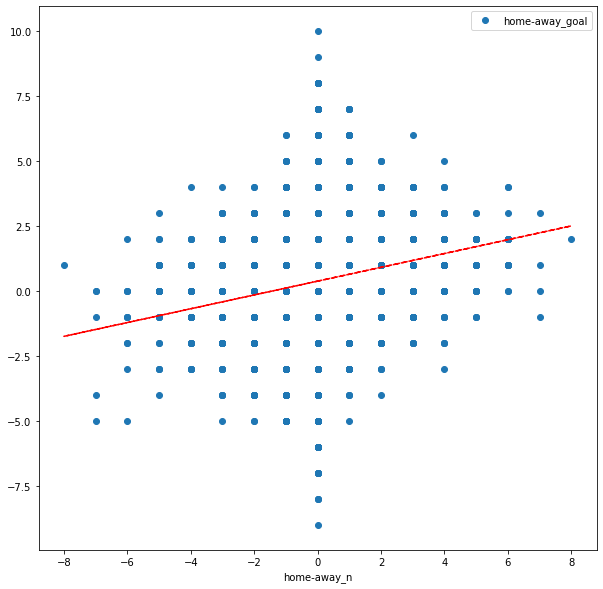

In [ ]:
# Yes it is "likely" to goal more (= win) if number of players are increasing
# If number of players are same, does not matter of course
dff.plot(x='home-away_n', y='home-away_goal', style='o', figsize = (10,10))
p = np.poly1d(np.polyfit(dff['home-away_n'], dff['home-away_goal'], 1))
plt.plot(dff['home-away_n'],p(dff['home-away_n']),"r--")

Summary
- All match results has league, date, team name, number of goals

- There're 243 data with no player and beting record
  - those only happened in 2008-2009 with 4 specific league
  - however there're some records exist even if data was in 2008-2009 and 4 specific league
    - Among 528 of data having same league and date as df_allNaN, 285 does not belong to df_allNaN

  - thus what makes 243 data no player and betting records are questionable
  - better to drop unless we only use result of game

- There're 515 data with no home and away player but betting record exist
  - It also happened in 2008-2009 with 3 specific league
  - however there're some records exist even if data was in 2008-2009 and 4 specific league
    - Among 587 of data having same league and date as df_xbothplayer, 72 does not belong to df_xbothplayer
  - thus what makes 515 data no player but betting record exists questionable
  - better drop unless we use betting result or result of game
- There's no such data that 0 vs 11 or 11 vs 0

- There are 3533 games that does not match number of home and away players
  - it is "likely" to goal more (= win) if team have more number of players than others

In [ ]:
dff['n_awayplayer']]